<a href="https://colab.research.google.com/github/pkhurt/computer-vision-course/blob/main/section_6_object_detection_corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corner detection
## What is a corner
A corner is a point whose local neighborhood stands in two dominant and different edge directions.

A corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness

## Some corner detection algorithms
* harris corner detection
* shi-tomasi corner detection

## harris corner detection
* Published 1988
* Idea: Looking for significant change in all directions
* Shifting / moving window will have a high major change in direction in a corner. Just like with a kernel sliding window. The change will be less along the edge direction on an edge without a corner. So the change should be clearly visible.

## Shi-Tomasi Corner detection
* Small change on harris algorithm that improved the result
* Minimum on detector result


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = "/content/drive/MyDrive/udemy/python_for_computervision_opencv/DATA/"


In [6]:
flat_chess = cv2.imread(DATA_DIR + "flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

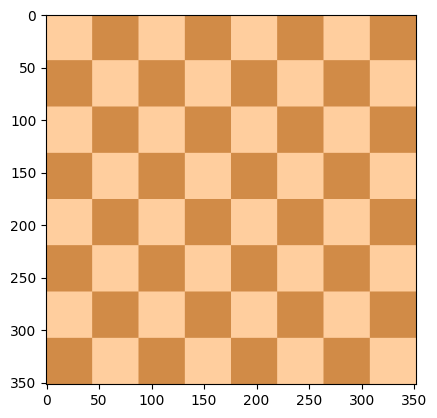

In [7]:
plt.imshow(flat_chess)

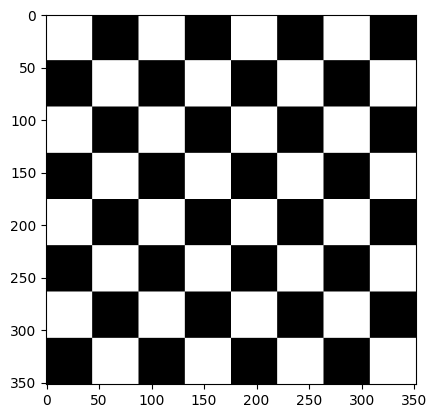

In [8]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap="gray")

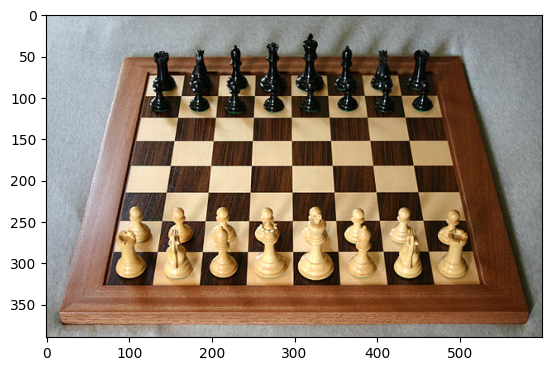

In [10]:
real_chess = cv2.imread(DATA_DIR + "real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

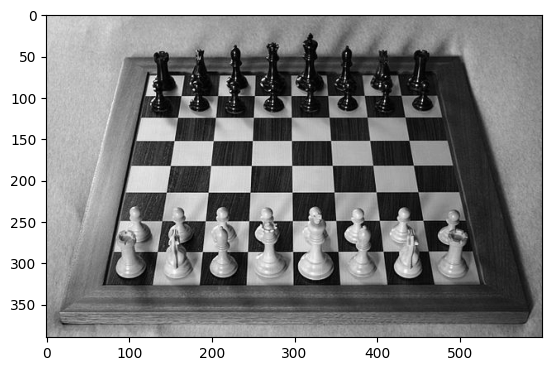

In [12]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap="gray")

In [13]:
## Now we  apply the corner harris detection on flat chess
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [14]:
# This is done just to show the results
dst = cv2.dilate(dst, None) # morphological operator

In [15]:
flat_chess[dst > 0.01*dst.max()] = [255, 0, 0] # At every position the result of the corner harris is greater than 1 % the max value that's a corner of the detection

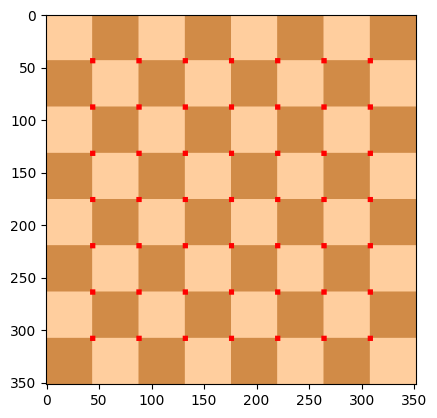

In [16]:
plt.imshow(flat_chess)

In [17]:
# now we try it on the more difficult real chessboard
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)


In [19]:
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01*dst.max()] = [255, 0, 0] # At every position the result of the corner harris is greater than 1 % the max value that's a corner of the detection

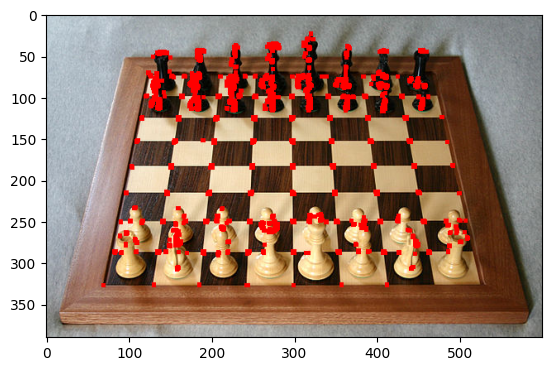

In [20]:
plt.imshow(real_chess)

## Shi-Tamasi Algorithm

In [26]:
flat_chess = cv2.imread(DATA_DIR + "flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread(DATA_DIR + "real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [28]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

<ipython-input-29-01e073a2e311>:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


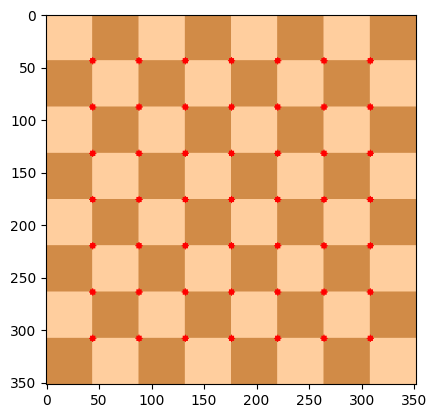

In [29]:
# draw circles where we found corners
# flat out array and draw circles
corners = np.int0(corners) # the returned corners are in float -> this turns them into integer, which is what we need
for i in corners:
  x,y = i.ravel() # flattening out
  cv2.circle(flat_chess, (x,y) ,3 ,(255,0,0) ,-1 )

plt.imshow(flat_chess)

<ipython-input-31-7a2eaec48a99>:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


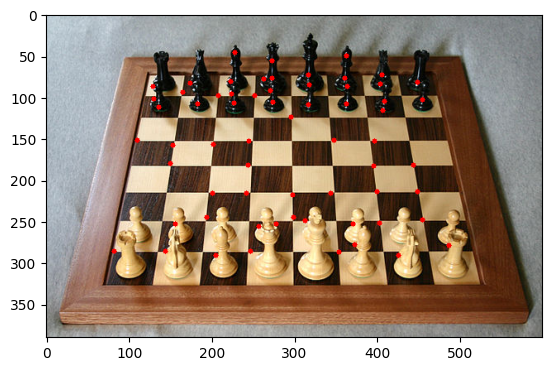

In [31]:
# try to re-run this on the real chessboard
corners = cv2.goodFeaturesToTrack(gray_real_chess, 64, 0.01, 10)
# draw circles where we found corners
# flat out array and draw circles
corners = np.int0(corners) # the returned corners are in float -> this turns them into integer, which is what we need
for i in corners:
  x,y = i.ravel() # flattening out
  cv2.circle(real_chess, (x,y) ,3 ,(255,0,0) ,-1 )

plt.imshow(real_chess)